## Panama Papers Exploration
This is an data exploration of panama papers. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import networkx as nx

%matplotlib inline

## 1. Import data

In [2]:
adds = pd.read_csv('offshore_leaks_csvs-20170104/Addresses.csv',\
                   low_memory = False).set_index('node_id')
ents = pd.read_csv('offshore_leaks_csvs-20170104/Entities.csv',\
                   low_memory = False).set_index('node_id')
inter = pd.read_csv('offshore_leaks_csvs-20170104/Intermediaries.csv',\
                    low_memory = False).set_index('node_id')
offi = pd.read_csv('offshore_leaks_csvs-20170104/Officers.csv',\
                   low_memory = False).set_index('node_id')
edges = pd.read_csv('offshore_leaks_csvs-20170104/all_edges.csv',\
                    low_memory = False)

## 2. Data preparation

In [3]:
# convert edge list to a network
F = nx.from_pandas_dataframe(edges,'node_1','node_2')

In [4]:
# combine node list to one dataframe
offi['type'] = 'officer'
inter['type'] = 'intermediary'
adds['type'] = 'address'
ents['type'] = 'entity'

In [5]:
all = pd.concat([offi, inter, adds, ents])

In [6]:
print all.columns

Index([u'address', u'company_type', u'countries', u'country_codes',
       u'dorm_date', u'former_name', u'ibcRUC', u'icij_id',
       u'inactivation_date', u'incorporation_date', u'internal_id',
       u'jurisdiction', u'jurisdiction_description', u'name', u'note',
       u'original_name', u'service_provider', u'sourceID', u'status',
       u'struck_off_date', u'type', u'valid_until'],
      dtype='object')


In [7]:
all.shape

(1041674, 22)

In [8]:
# clean data and format
all['name'] = all['name'].str.upper()
all['name'] = all['name'].str.strip()
all['name'].replace(to_replace=[r'MRS?\.\s+',r'\.',r'\s+',\
                                'LIMITED','THE BEARER'],\
                    value=['','',' ','LTD',np.nan],inplace=True, regex=True)

## 3. Explore the data and network

In [9]:
# Deng Jiagui
seeds = [12160401]
tmp=[set(nx.single_source_shortest_path_length(F, x, cutoff=4).keys()) for x in seeds]
nodes_of_interest = set.union(*tmp)

In [10]:
len(nodes_of_interest)

1088

In [11]:
ego = nx.subgraph(F, nodes_of_interest)
print nx.info(ego)

Name: 
Type: Graph
Number of nodes: 1088
Number of edges: 1263
Average degree:   2.3217


In [12]:
spring_pos = nx.spring_layout(ego)

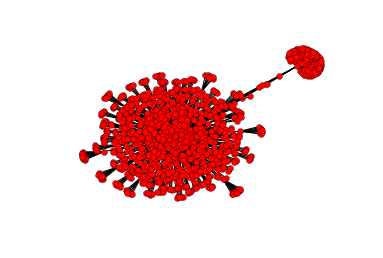

In [13]:
plt.axis('off')
nx.draw_networkx(ego,pos=spring_pos,with_labels=False,node_size=35)